In [12]:
import cv2 as cv

# 行内显示图片
def cv2_imshow(image):
    return plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

def plt_format(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 弹出窗口展示图片
def window_show(image):
    cv.imshow('image',image)
    cv.waitKey(10000)
    cv.destroyAllWindows()

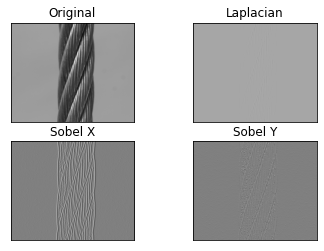

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(th2,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(th2,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()
window_show(sobelx)

In [20]:
import math
edge_threshold = 30.0
# 0:所有边缘，1：第一个边缘，2：最后一个边缘，3：边缘强度最高的一个
edge_type = 3
# 0:所有极性，1:正边缘(由黑到白)，2:负边缘（由白到黑）
edge_polarity = 0
img_s = sobelx
img_s_abs = np.abs(img_s)
print( img_s_abs > edge_threshold)

indice = []
values = []
for index in range(img_s.shape[1]):
    if img_s_abs[0, index] > edge_threshold:
        if edge_type == 0:
            if edge_polarity == 0:
                values.append(img_s[0, index])
                indice.append(index)
            elif edge_polarity == 1 and img_s[0, index] > 0:
                values.append(img_s[0, index])
                indice.append(index)
            elif edge_polarity == 2 and img_s[0, index] < 0:
                values.append(img_s[0, index])
                indice.append(index)
        elif edge_type == 1:
            if edge_polarity == 0:
                indice.append(index)
                values.append(img_s[0, index])
                break
            elif edge_polarity == 1 and img_s[0, index] > 0:
                indice.append(index)
                values.append(img_s[0, index])
                break
            elif edge_polarity == 2 and img_s[0, index] < 0:
                values.append(img_s[0, index])
                indice.append(index)
                break
        elif edge_threshold == 2:
            if edge_polarity == 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    indice[0] = index
                    values[1] = img_s[0, index]
            elif edge_polarity == 1 and img_s[0, index] > 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    indice[0] = index
                    values[1] = img_s[0, index]
            elif edge_polarity == 2 and img_s[0, index] < 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    indice[0] = index
                    values[1] = img_s[0, index]
        else:
            if edge_polarity == 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    if np.abs(values[1] < img_s_abs[0, index]):
                        indice[0] = index
                        values[1] = img_s[0, index]
            elif edge_polarity == 1 and img_s[0, index] > 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    if np.abs(values[1] < img_s_abs[0, index]):
                        indice[0] = index
                        values[1] = img_s[0, index]
            elif edge_polarity == 2 and img_s[0, index] < 0:
                if (len(indice) == 0):
                    indice.append(index)
                    values.append(img_s[0, index])
                else:
                    if np.abs(values[1] < img_s_abs[0, index]):
                        indice[0] = index
                        values[1] = img_s[0, index]


[[False False False ...  True  True False]
 [False False False ...  True  True False]
 [False False False ...  True  True False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


IndexError: list index out of range

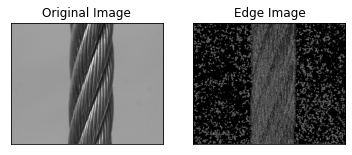

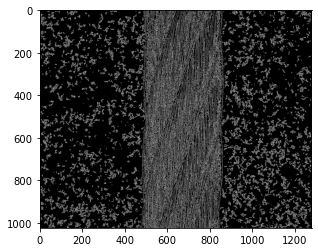

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,1,20)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(edges)

In [38]:
import numpy as np
import cv2 as cv
im = cv.imread('09.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(th2, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL,
cv.CHAIN_APPROX_SIMPLE)

In [ ]:
print(contours)

In [40]:
con = cv.drawContours(th2, contours, -1, (0,255,0), 3)

In [41]:
contours.sort(key=lambda c: cv.contourArea(c), reverse=True)

AttributeError: 'tuple' object has no attribute 'sort'

In [47]:
mask=cv.drawContours(th2,contours,0,255,cv.FILLED)

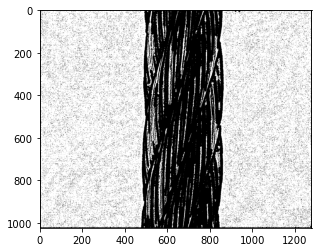

In [48]:
cv2_imshow(mask)

In [ ]:
# 获取极端点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

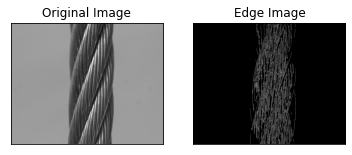

In [26]:
# canny边缘检测
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,100,20)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

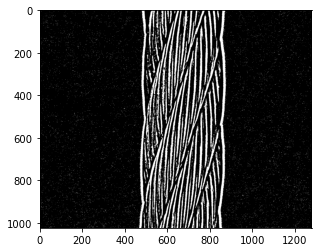

In [28]:
import cv2 as cv
img = cv.imread('09.png',0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,-2)
cv2_imshow(th2)

第三个参数（255）：超过阈值的部分取值是多少（对于cv.THRESH_BINARY而言）

第四个参数（cv.ADAPTIVE_THRESH_MEAN_C）：
（1）在一个邻域内计算阈值所采用的算法，有两个取值，分别为 ADAPTIVE_THRESH_MEAN_C 和 ADAPTIVE_THRESH_GAUSSIAN_C
（2）ADAPTIVE_THRESH_MEAN_C的计算方法是计算出领域的平均值再减去第七个参数2的值。
（3）ADAPTIVE_THRESH_GAUSSIAN_C的计算方法是计算出领域的高斯均值再减去第七个参数2的值

第五个参数（cv.THRESH_BINARY）：这是阈值类型，只有两个取值，分别为 THRESH_BINARY 和THRESH_BINARY_INV

第六个参数（11）：adaptiveThreshold的计算单位是像素的邻域块大小选择，这是局部邻域大小，3、5、7等

第七个参数（2）：这个参数实际上是一个偏移值调整量，用均值和高斯计算阈值后，再减或加这个值就是最终阈值。

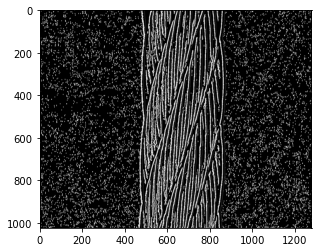

In [98]:
image = np.array(sobelx,np.uint8)
cv2_imshow(image)
# window_show(sobelx)

In [92]:
sobelx.shape

(1024, 1280)

In [91]:
imgray = cv.cvtColor(sobelx, cv.COLOR_BGR2GRAY)

error: OpenCV(4.6.0) D:\bld\libopencv_1657598065368\work\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x556b845a::Set<1,-1,-1>,struct cv::impl::A0x556b845a::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [29]:
# cv.RETR_TREE会完整建立轮廓的层级从属关系，[1]代表只获得hierarchy，它是一个包含4个值的数组：[Next, Previous, First Child, Parent]
contours1 = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
# print(contours1)
# 对轮廓的面积降序排列
contours1 = sorted(contours1, key=cv.contourArea, reverse=True)

In [31]:
# 遍历所有的轮廓
line2 = []
mask = np.zeros(img.shape,np.uint8)
for i,error_value in enumerate(contours1):
    if i < 10:
        minArea = cv.minAreaRect(error_value)
        area = cv.contourArea(error_value)
        # cv.imshow('roi2', roi2)
        width = int(minArea[1][1])
        height = int(minArea[1][0])
        if width > 1000 and height <50:
            roi2 = cv.drawContours(mask,error_value,-1,(255,0,0),3)
            line2.append(error_value)
            window_show(roi2)
            # if minArea[1][0] > minArea[1][1]:
            #     width = int(minArea[1][0])
            #     height = int(minArea[1][1])
            # else:
            #     width = int(minArea[1][1])
            #     height = int(minArea[1][0])
            # 判断轮廓的大小是否合适
            print(width,height)
            # print(w2,h2)

1023 33
1023 27


In [11]:
import numpy as np
 
a = np.array([[[5,2,3]],[[3,4,5]],[[4,5,6]]])
print (a[...,1])   # 第2列元素
# print (a[1,...])   # 第2行元素
# print (a[...,1:])  # 第2列及剩下的所有元素

print(np.sort(a[...,0], axis = 0))

[[2]
 [4]
 [5]]
[[3]
 [4]
 [5]]


In [5]:
import numpy as np 
 
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print ('我们的数组是：')
print (x)
print ('\n')
# 现在我们会打印出大于 5 的元素  
print  ('大于 5 的元素是：')
print (x[x >  5])

我们的数组是：
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


大于 5 的元素是：
[ 6  7  8  9 10 11]


In [ ]:
mask=cv.drawContours(th2,contours,0,255,cv.FILLED)

True

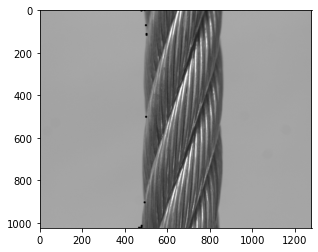

In [77]:
img = cv.imread('09.png',0)
# img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# ret,thresh = cv.threshold(img_gray, 127, 255,0)
# 获取轮廓
# contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours1[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    # cv.line(img,start,end,[0,255,0],2)
    # cv.circle(img,far,5,[0,0,255],-1)
    cv.circle(img,start,5,[0,0,255],-1)
    cv.circle(img,end,5,[0,0,255],-1)
cv2_imshow(img)
cv.imwrite('point.png',img)

In [39]:
line3 = np.squeeze(line2[1])

In [40]:
line3.shape

(2298, 2)

In [47]:
min(line3[...,1])

0

In [38]:
# 矩阵降维
import numpy as np

a = np.array([[[1, 2, 3]], [[4, 5, 6]]])
print(a.shape)
c = []
for x in a.flat:
    c.append(x)
print('flat迭代器降一维：\n', c)
d = a.flatten()
print('flatten方法降一维：\n', d)
e = a.ravel()
print('ravel方法降一维：\n', e)
g = np.squeeze(a)
print('squeeze方法降一维：\n', g)
f = a.reshape(-1)
print('reshape方法降一维：\n', f)
a.resize((1, 6))
print('resize方法：\n', a)

(2, 1, 3)
flat迭代器降一维：
 [1, 2, 3, 4, 5, 6]
flatten方法降一维：
 [1 2 3 4 5 6]
ravel方法降一维：
 [1 2 3 4 5 6]
squeeze方法降一维：
 [[1 2 3]
 [4 5 6]]
reshape方法降一维：
 [1 2 3 4 5 6]
resize方法：
 [[1 2 3 4 5 6]]


[0 1 2 ... 0 1 1] [479 479 478 ... 482 481 480]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


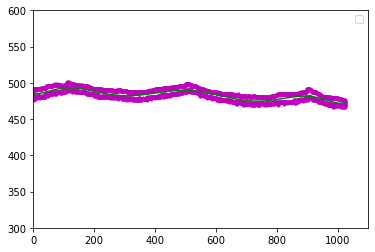

In [56]:
# 曲线拟合
import matplotlib.pyplot as plt
import math
import numpy
import random

fig = plt.figure()
ax = fig.add_subplot(111)
 
#阶数为9阶
order=9
 
#生成曲线上的各个点
xa = line3[...,1]
ya = line3[...,0]
#ax.plot(x,y,color='r',linestyle='-',marker='')
#,label="(a*a-1)*(a*a-1)*(a*a-1)+0.5"
 
#生成的曲线上的各个点偏移一下，并放入到xa,ya中去
# i=0
# xa=[]
# ya=[]
# for xx in x:
# 	yy=y[i]
# 	d=float(random.randint(60,140))/100
# 	#ax.plot([xx*d],[yy*d],color='m',linestyle='',marker='.')
# 	i+=1
# 	xa.append(xx*d)
# 	ya.append(yy*d)

"""for i in range(0,5):
	xx=float(random.randint(-100,100))/100
	yy=float(random.randint(-60,60))/100
	xa.append(xx)
	ya.append(yy)
"""
print(xa,ya)
ax.plot(xa,ya,color='m',linestyle='',marker='.')
# 进行曲线拟合
matA=[]
for i in range(0,order+1):
	matA1=[]
	for j in range(0,order+1):
		tx=0.0
		for k in range(0,len(xa)):
			dx=1.0
			for l in range(0,j+i):
				dx=dx*xa[k]
			tx+=dx
		matA1.append(tx)
	matA.append(matA1)

#print(len(xa))
#print(matA[0][0])
matA=numpy.array(matA)
 
matB=[]
for i in range(0,order+1):
	ty=0.0
	for k in range(0,len(xa)):
		dy=1.0
		for l in range(0,i):
			dy=dy*xa[k]
		ty+=ya[k]*dy
	matB.append(ty)

matB=numpy.array(matB)
 
matAA=numpy.linalg.solve(matA,matB)
 
#画出拟合后的曲线
#print(matAA)
xxa= numpy.arange(0,1023)
yya=[]
for i in range(0,len(xxa)):
	yy=0.0
	for j in range(0,order+1):
		dy=1.0
		for k in range(0,j):
			dy*=xxa[i]
		dy*=matAA[j]
		yy+=dy
	yya.append(yy)
ax.plot(xxa,yya,color='g',linestyle='-',marker='')
plt.xlim(0,1100) #x坐标轴范围-10~10
plt.ylim(300,600)
ax.legend()
plt.savefig('拟合曲线.png') # ⽂件名：png、jpg、pdf
plt.show()

# dpi = 100, # 保存图⽚像素密度
# facecolor = 'violet', # 视图与边界之间颜⾊设置
# edgecolor = 'lightgreen', # 视图边界颜⾊设置
# bbox_inches = 'tight')# 保存图⽚完整